In [161]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

# Dataset

In [162]:
df =pd.read_csv('https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv')

In [163]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


# EDA

In [164]:
df.ocean_proximity.nunique()

5

<AxesSubplot:xlabel='median_house_value', ylabel='Count'>

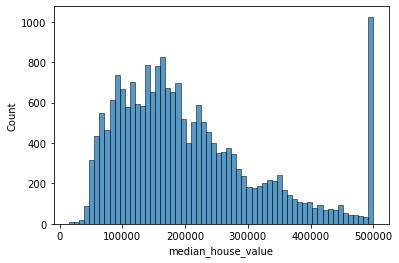

In [165]:
sns.histplot(df.median_house_value, bins=60)

# Features

In [166]:

features= [ 'latitude',
            'longitude',
            'housing_median_age',
            'total_rooms',
            'total_bedrooms',
            'population',
            'households',
            'median_income',
            'median_house_value'
            ]

features

['latitude',
 'longitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'median_house_value']

In [167]:
df=df[features]
df.head()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,37.88,-122.23,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,37.86,-122.22,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,37.85,-122.24,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,37.85,-122.25,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,37.85,-122.25,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


# Question 1
Find a feature with missing values. How many missing values does it have?

* 207
* 307
* 408
* 508

In [168]:
df.isnull().sum()


latitude                0
longitude               0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

# Question 2
What's the median (50% percentile) for variable 'population'?

* 1133
* 1122
* 1166
* 1188

In [169]:
df.population.median()

1166.0

# Split The Data
* Shuffle the initial dataset, use seed 42.
* Split your data in train/val/test sets, with 60%/20%/20% distribution.
* Make sure that the target value ('median_house_value') is not in your dataframe.
* Apply the log transformation to the median_house_value variable using the np.log1p() function.

In [170]:
# calculos el 

n = len(df)
n_val = int(n * .2)
n_test = int(n * .2)
n_train = n - n_val - n_test
n_train, n_val, n_test

(12384, 4128, 4128)

In [171]:
np.random.seed(42)
idx = np.arange(n)
np.random.shuffle(idx)


In [172]:
df_train = df.iloc[idx[:n_train]].reset_index(drop=True)
df_val = df.iloc[idx[n_train:n_train+n_val]].reset_index(drop=True)
df_test = df.iloc[idx[n_train+n_val:]].reset_index(drop=True)

y_train = np.log1p(df_train['median_house_value'])
y_val = np.log1p(df_val['median_house_value'])
y_test = np.log1p(df_test['median_house_value'])

df_train.drop('median_house_value',axis=1, inplace=True)
df_val.drop('median_house_value',axis=1, inplace=True)
df_test.drop('median_house_value',axis=1, inplace=True)


# Question 3

* We need to deal with missing values for the column from Q1.
* We have two options: fill it with 0 or with the mean of this variable.
* Try both options. For each, train a linear regression model without regularization using the code from the lessons.
* For computing the mean, use the training only!
* Use the validation dataset to evaluate the models and compare the RMSE of each option.
* Round the RMSE scores to 2 decimal digits using round(score, 2)
* Which option gives better RMSE?

Options:

* With 0
* With mean
* Both are equally good


In [173]:
# funciones regresion lineal y score RMSE

def train_reg_lineal (X,y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones,X])
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full= XTX_inv.dot(X.T).dot(y)

    
    return w_full[0], w_full[1:]

def rmse(y,y_pred):
    error = y - y_pred
    se = error ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [174]:
mean = df_train['total_bedrooms'].mean(skipna=True)
df_train_mean = df_train.copy()
df_train_zero = df_train.copy()
mean

533.4803317730147

In [175]:
df_train_mean['total_bedrooms'].fillna(mean,inplace=True)
df_train_zero['total_bedrooms'].fillna(0,inplace=True)
df_train_zero['total_bedrooms'].head(), df_train_mean['total_bedrooms'].head()

(0    0.0
 1    0.0
 2    0.0
 3    0.0
 4    0.0
 Name: total_bedrooms, dtype: float64,
 0    533.480332
 1    533.480332
 2    533.480332
 3    533.480332
 4    533.480332
 Name: total_bedrooms, dtype: float64)

In [176]:
# RMSE dataset con los nulos reemplazados por la media
w0, w = train_reg_lineal(df_train_mean,y_train)
y_pred = w0 + df_val.dot(w)
round(rmse(y_val, y_pred),2)

0.33

In [177]:
# RMSE dataset con los nulos reemplazados por cero
w0, w = train_reg_lineal(df_train_zero,y_train)
y_pred = w0 + df_val.dot(w)
round(rmse(y_val,y_pred),2)

0.33

# Question 4
* Now let's train a regularized linear regression.
* For this question, fill the NAs with 0.
* Try different values of r from this list: [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10].
* Use RMSE to evaluate the model on the validation dataset.
* Round the RMSE scores to 2 decimal digits.
* Which r gives the best RMSE?
* If there are multiple options, select the smallest r.

Options:

* 0
* 0.000001
* 0.001
* 0.0001

In [178]:
reg = [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]

def train_reg_lineal_regularizacion(X,y,r):

    ones = np.ones(X.shape[0])
    X = np.column_stack([ones,X])

    XTX = X.T.dot(X)
    XTX = XTX + r + np.eye(XTX.shape[0])
    
    XTX_inv = np.linalg.inv(XTX)
    w_full= XTX_inv.dot(X.T).dot(y)

    
    return w_full[0], w_full[1:]

In [179]:
# RMSE dataset con los nulos reemplazados por cero
for r in [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:

    w0, w = train_reg_lineal_regularizacion(df_train_zero,y_train,r)
    y_pred = w0 + df_val.dot(w)

    #round(rmse(y_train,y_pred),2)
    print (r, "- ", round(rmse(y_val,y_pred),7))

0 -  0.3337887
1e-06 -  0.3337887
0.0001 -  0.3337891
0.001 -  0.3337926
0.01 -  0.3338273
0.1 -  0.3341611
1 -  0.3365323
5 -  0.3399083
10 -  0.3409846


# Question 5
* We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
* Try different seed values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9].
* For each seed, do the train/validation/test split with 60%/20%/20% distribution.
* Fill the missing values with 0 and train a model without regularization.
* For each seed, evaluate the model on the validation dataset and collect the RMSE scores.
* What's the standard deviation of all the scores? To compute the standard deviation, use np.std.
* Round the result to 3 decimal digits (round(std, 3))

*|| Note: Standard deviation shows how different the values are. If it's low, then all values are approximately the same. If it's high, the values are different. If standard deviation of scores is low, then our model is stable.*

Options:

* 0.16
* 0.00005
* 0.005
* 0.15555

In [180]:
seeds = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

score =[]
for seed in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
    #print(seed)
    np.random.seed(seed)
    idx = np.arange(n)
    np.random.shuffle(idx)

    df_train = df.iloc[idx[:n_train]].reset_index(drop=True)
    df_val = df.iloc[idx[n_train:n_train+n_val]].reset_index(drop=True)
    df_test = df.iloc[idx[n_train+n_val:]].reset_index(drop=True)

    y_train = np.log1p(df_train['median_house_value'])
    y_val = np.log1p(df_val['median_house_value'])
    y_test = np.log1p(df_test['median_house_value'])

    df_train.drop('median_house_value',axis=1, inplace=True)
    df_val.drop('median_house_value',axis=1, inplace=True)
    df_test.drop('median_house_value',axis=1, inplace=True)

    df_train_zero = df_train.copy()
    df_train_zero['total_bedrooms'].fillna(0,inplace=True)

    w0, w = train_reg_lineal(df_train_zero,y_train)
    y_pred = w0 + df_val.dot(w)
    score.append(rmse(y_val,y_pred))
    
round(np.std(score),3)


0.004

# Question 6
* Split the dataset like previously, use seed 9.
* Combine train and validation datasets.
* Fill the missing values with 0 and train a model with r=0.001.
* What's the RMSE on the test dataset?

Options:

* 0.35
* 0.135
* 0.450
* 0.245

In [ ]:
    np.random.seed(9)
    idx = np.arange(n)
    np.random.shuffle(idx)

    df_train = df.iloc[idx[:n_train]].reset_index(drop=True)
    df_val = df.iloc[idx[n_train:n_train+n_val]].reset_index(drop=True)
    df_test = df.iloc[idx[n_train+n_val:]].reset_index(drop=True)
    y_train = np.log1p(df_train['median_house_value'])
    y_val = np.log1p(df_val['median_house_value'])
    y_test = np.log1p(df_test['median_house_value'])

    df_train.drop('median_house_value',axis=1, inplace=True)
    df_val.drop('median_house_value',axis=1, inplace=True)
    df_test.drop('median_house_value',axis=1, inplace=True)



In [186]:
df_train = pd.concat([df_train,df_val],)
df_train.reset_index(inplace=True)
df_train['total_bedrooms'].fillna(0,inplace=True)

In [191]:
w0, w = train_reg_lineal_regularizacion(df_train_zero,y_train,0.001)
y_pred = w0 + df_val.dot(w)

#round(rmse(y_train,y_pred),2)
print (round(rmse(y_val,y_pred),2))

0.34
